In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import math

In [90]:
def select_Filter(name):
    if name == 0:
        matrix = [
            [1,1,1,1,1],
            [1,1,1,1,1],
            [1,1,1,1,1],
            [1,1,1,1,1],
            [1,1,1,1,1]
        ]
        s= 1/25
    if name == 1:
        matrix = [
            [0,1,2,1,0],
            [1,3,5,3,1],
            [2,5,9,5,2],
            [1,3,5,3,1],
            [0,1,2,1,0]
        ]
        s=1/57
    if name == 2:
        matrix = [
            [0,0,-1,0,0],
            [0,-1,-2,-1,0],
            [-1,-2,16,-2,-1],
            [0,-1,-2,-1,0],
            [0,0,-1,0,0]
        ]
        s=1/16
    return int(len(matrix)/2),int(len(matrix[0])/2),matrix,s
            

In [98]:
'''under construction'''
def image_Filter(img,filter_type):
    img_H,img_W = img.shape
    if filter_type == 0:
        mask_H,mask_W,matrix,s = select_Filter(0)
    if filter_type == 1:
        mask_H,mask_W,matrix,s =  select_Filter(1)
    if filter_type == 2:
        mask_H,mask_W,matrix,s = select_Filter(2)
        
        
    img_copy = img
    for v in range(0,img_H):
        for u in range(0,img_W):
            summy =0
            for j in range(-mask_H,mask_H):
                for i in range(-mask_W,mask_W):
                    if v+j < 0 or v+j > img_H-1 or u+i <0 or u+i> img_W-1:
                        summy = summy + 0
                    else:
                        p = img_copy[v+j,u+i]
                        c = matrix[j+mask_H][i+mask_W]
                        summy = summy + c*p              
            q = round(s*summy)
            if (q < 0) :
                q = 0
            if (q > 255):
                q = 255
            img[v][u] = q
            
    return img

In [47]:
def rescale(img,scale):
    scale_percent = scale # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [81]:
#import images from a folder into list
image_list = []
for filename in glob.glob('TU_pic/*.jpg'):
    image_list.append(filename)
    print(filename)

TU_pic\0645133-18878.jpg
TU_pic\0645133-18879.jpg
TU_pic\0645133-18880.jpg
TU_pic\0645133-18924.jpg
TU_pic\0645133-18925.jpg
TU_pic\0645133-18926.jpg
TU_pic\0645133-18927.jpg
TU_pic\0704716-18939.jpg
TU_pic\0704716-18940.jpg
TU_pic\0922091-18941.jpg
TU_pic\0922091-18942.jpg


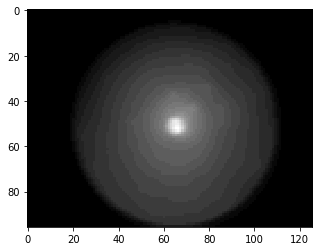

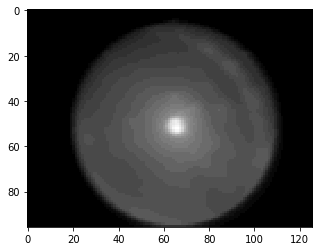

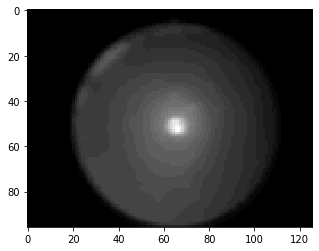

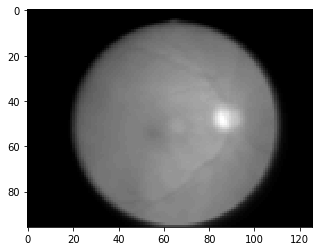

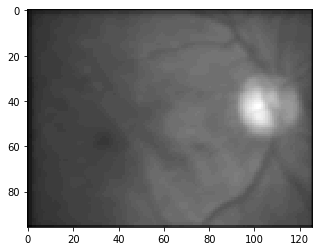

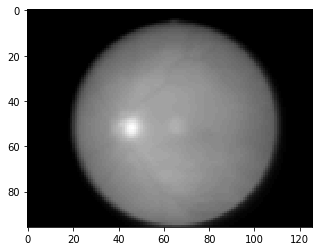

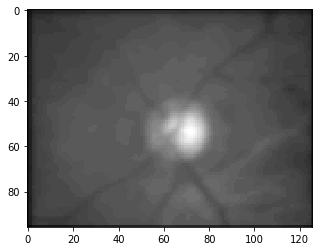

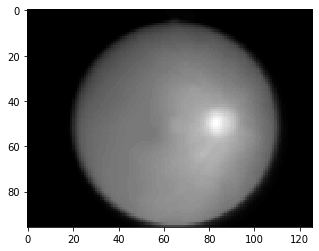

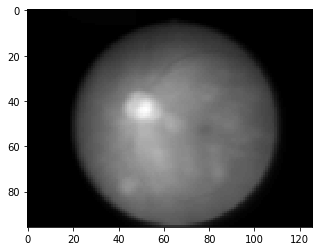

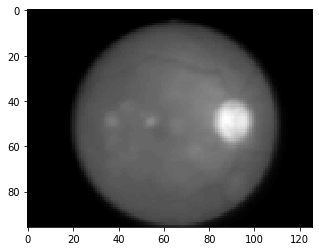

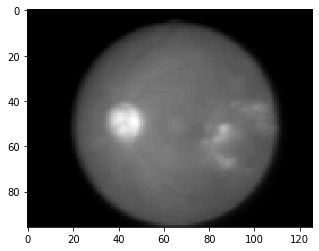

In [100]:
for pic_name in image_list:
    img = cv2.imread(pic_name,0)
    img1 =  rescale(img,5)
    img2 = image_Filter(img1,0)
    plt.figure()
    plt.imshow(img2,cmap ="gray")

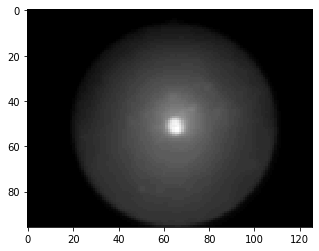

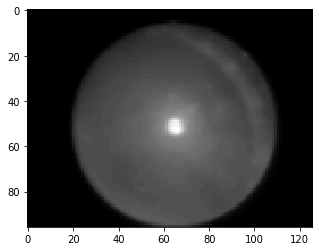

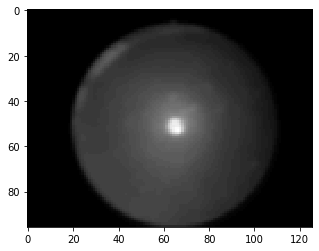

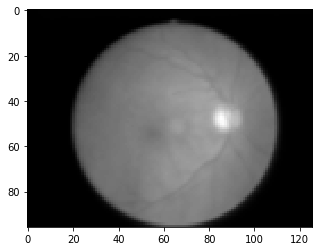

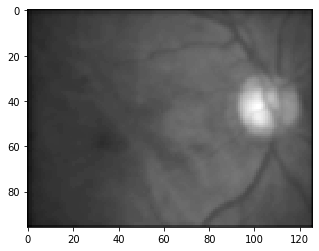

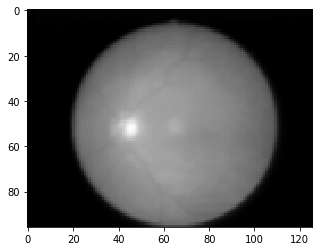

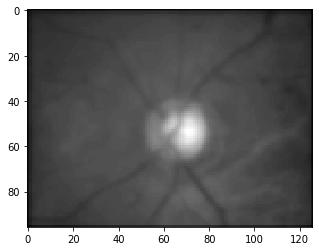

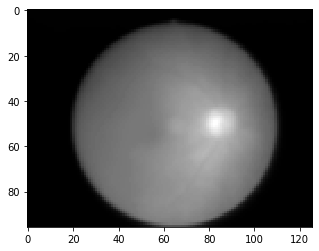

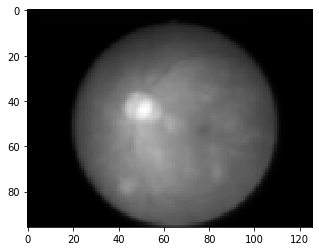

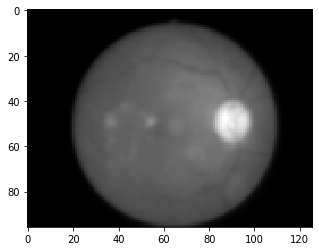

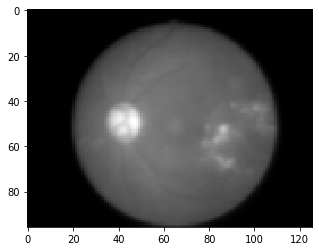

In [103]:
for pic_name in image_list:
    img = cv2.imread(pic_name,0)
    img1 =  rescale(img,5)
    img2 = image_Filter(img1,1)
    plt.figure()
    plt.imshow(img2,cmap ="gray")

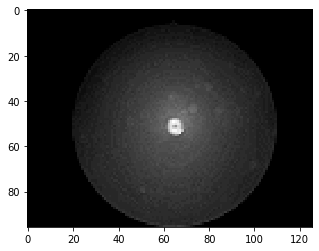

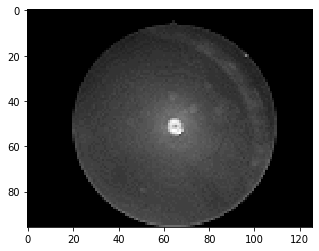

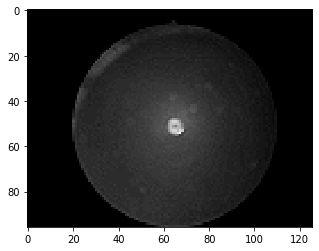

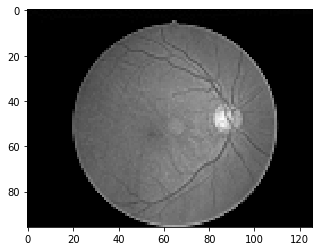

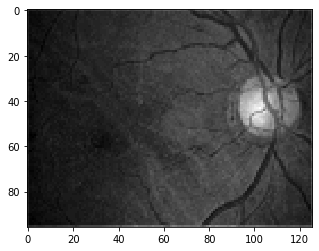

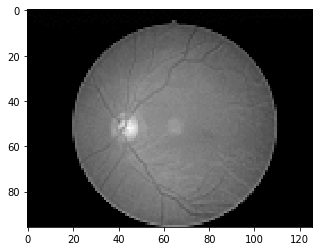

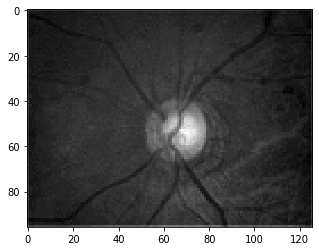

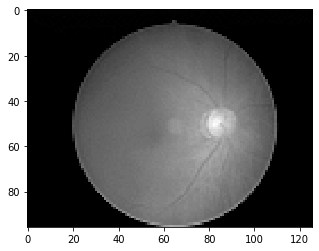

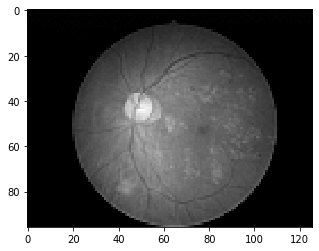

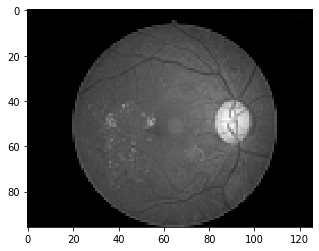

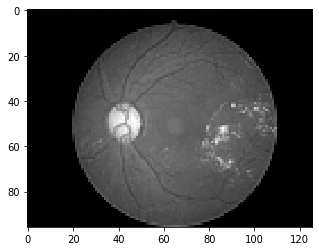

In [102]:
for pic_name in image_list:
    img = cv2.imread(pic_name,0)
    img1 =  rescale(img,5)
    img2 = image_Filter(img1,2)
    plt.figure()
    plt.imshow(img2,cmap ="gray")